In [26]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [40]:



import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress



# Import API key
api_key = "28d638d9e70eb47c9b0f8a634362d504"



# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [41]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

In [42]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

In [47]:
print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
City not found. Skipping...
Processing Record 5 of Set 10 : bredasdorp
Processing Record 6 of Set 10 : abha
Processing Record 7 of Set 10 : jalu
Processing Record 8 of Set 10 : sheridan
Processing Record 9 of Set 10 : road town
Processing Record 10 of Set 10 : petaling jaya
Processing Record 11 of Set 10 : andra
Processing Record 12 of Set 10 : amarillo
Processing Record 13 of Set 10 : bluff
Processing Record 14 of Set 10 : coquimbo
Processing Record 15 of Set 10 : moosburg
Processing Record 16 of Set 10 : beipiao
Processing Record 17 of Set 10 : lincoln
Processing Record 18 of Set 10 : mtwara
Processing Record 19 of Set 10 : busselton
Processing Record 20 of Set 10 : saint-philippe
Processing Record 21 of Set 10 : wanning
Processing Record 22 of Set 10 : hilo
Processing Record 23 of Set 10 : maumere
Processing Record 24 of Set 10 : tura
Processing Record 25 of Set 10 : calama
Processing Record 26 of Set 10 : zheleznodorozhnyy
Pro

In [48]:
# Create a panda data frame using data retrieved
weather_dict = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list})

weather_dict.count()



City          1029
Cloudiness    1029
Country       1029
Date          1029
Humidity      1029
Lat           1029
Lng           1029
Max Temp      1029
Wind Speed    1029
dtype: int64

In [49]:
weather_dict


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Bredasdorp,2,ZA,1605245069,61,-34.53,20.04,72.00,1.01
1,Abhā,20,SA,1605245353,82,18.22,42.51,62.60,4.70
2,Jalu,16,LY,1605245354,85,29.03,21.55,60.46,6.24
3,Sheridan,1,US,1605245354,67,44.83,-106.92,26.01,4.70
4,Road Town,40,VG,1605245142,86,18.42,-64.62,80.01,5.99
...,...,...,...,...,...,...,...,...,...
1024,Severnyy,0,RU,1605245742,100,50.68,36.55,23.00,2.24
1025,Aginskoye,7,RU,1605245743,76,51.10,114.53,34.59,5.64
1026,Srednekolymsk,98,RU,1605245743,89,67.45,153.68,-13.13,1.25
1027,Marrakesh,75,MA,1605245743,77,31.63,-8.01,60.80,5.82


In [50]:

# Save city data into a csv file
weather_dict.to_csv("cities.csv", index = False)

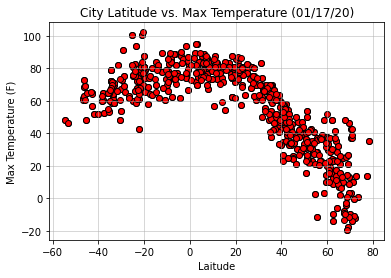

In [52]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], facecolor = "red", edgecolor = "black")


# Set title
plt.title("City Latitude vs. Max Temperature (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)


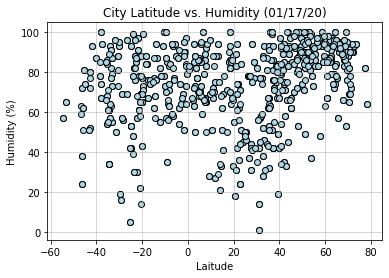

In [54]:

# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "lightblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)



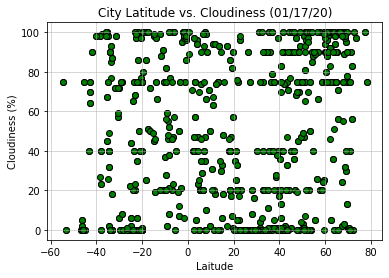

In [55]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], facecolor = "green", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

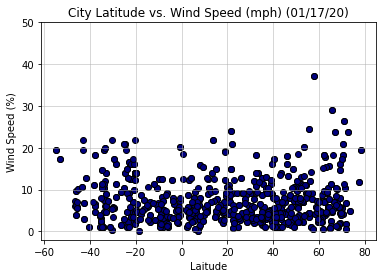

In [56]:
#Latitude vs. Wind Speed
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], facecolor = "navy", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph) (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

In [57]:

# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_dict.loc[weather_dict["Lat"] >= 0]
southern_hemisphere = weather_dict.loc[weather_dict["Lat"] < 0]


In [58]:
# Define function for creating linear agression and scatter plot
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

The r-squared is : -0.89


Text(0, 0.5, 'Max Temp (F)')

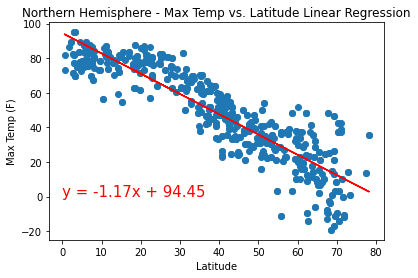

In [59]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

In [72]:
print('-----------------------------------------------------------------------------------------------------------------------------')
print("The Liner regression shows a sharp decline in Temperature as the Latitude increaces on the x-axis indecating cooler temps at the northern reagion")
      
print('------------------------------------------------------------------------------------------------------------------------------')


-----------------------------------------------------------------------------------------------------------------------------
The Liner regression shows a sharp decline in Temperature as the Latitude increaces on the x-axis indecating cooler temps at the northern reagion
------------------------------------------------------------------------------------------------------------------------------


The r-squared is : 0.57


Text(0, 0.5, 'Max Temp (F)')

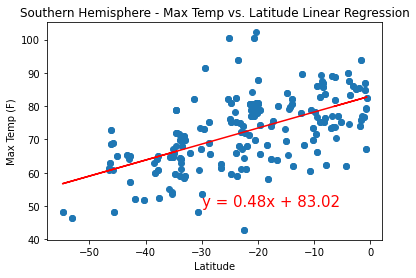

In [60]:

# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, -30, 50)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

In [73]:
print('-----------------------------------------------------------------------------------------------------------')
print("Here we can see a steady climb to a positive correlation indecating rising temps in the southern hemisphere")
print('-----------------------------------------------------------------------------------------------------------')


-----------------------------------------------------------------------------------------------------------
Here we can see a steady climb to a positive corrilation indecating rising temps in the southern hemisphere
-----------------------------------------------------------------------------------------------------------


The r-squared is : 0.33


Text(0, 0.5, 'Humidity (%)')

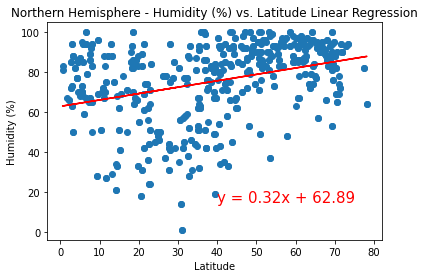

In [61]:
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, 40, 15)

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

In [74]:
print('-----------------------------------------------------------------------------------------------------------')
print("A moderate positive correlation appears, the further away from Lat 0 you go the higher percentage of humidity")
print('-----------------------------------------------------------------------------------------------------------')

-----------------------------------------------------------------------------------------------------------
A moderate positive correlation appears, the further away from Lat 0 you go the higher percentage of humidity
-----------------------------------------------------------------------------------------------------------


The r-squared is : 0.19


Text(0, 0.5, 'Humidity (%)')

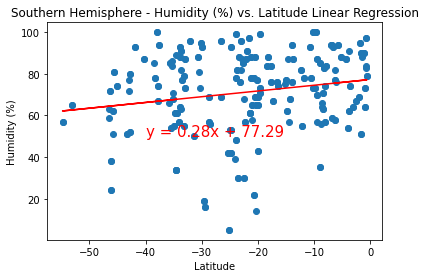

In [62]:
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, -40, 50)

# Set title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

In [75]:
print('-----------------------------------------------------------------------------------------------------------')
print("Not shocking we see another possitive rise headed to Lat 0 and a lowwer humidity percentage on the negative side of Lat0")
print('-----------------------------------------------------------------------------------------------------------')

-----------------------------------------------------------------------------------------------------------
Not shocking we see another possitive rise headed to Lat 0 and a lowwer humidity percentage on the negative side of Lat0
-----------------------------------------------------------------------------------------------------------


The r-squared is : 0.29


Text(0, 0.5, 'Cloudiness (%)')

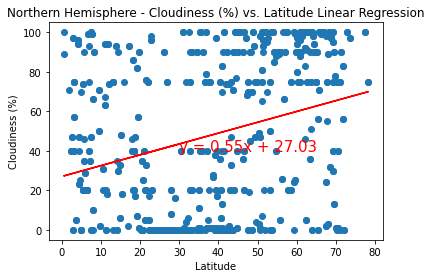

In [63]:
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, 30, 40)

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")


In [76]:
print('-----------------------------------------------------------------------------------------------------------')
print("Although a positive correlation shows, I feel that there is no corrilation to the cloudiness percentage and Lat LinReg")
print('-----------------------------------------------------------------------------------------------------------')

-----------------------------------------------------------------------------------------------------------
Although a positive correlation shows, I feel that there is no corrilation to the cloudiness percentage and Lat LinReg
-----------------------------------------------------------------------------------------------------------


The r-squared is : 0.21


Text(0, 0.5, 'Cloudiness (%)')

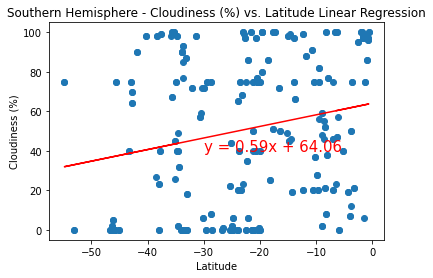

In [64]:
 #Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, -30, 40)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")


In [77]:
print('-----------------------------------------------------------------------------------------------------------')
print("same for this plot chart, still positive but the points look all over the place")
print('-----------------------------------------------------------------------------------------------------------')

-----------------------------------------------------------------------------------------------------------
same for this plot chart, still positive but the points look all over the place
-----------------------------------------------------------------------------------------------------------


The r-squared is : 0.12


Text(0, 0.5, 'Wind Speed (mph)')

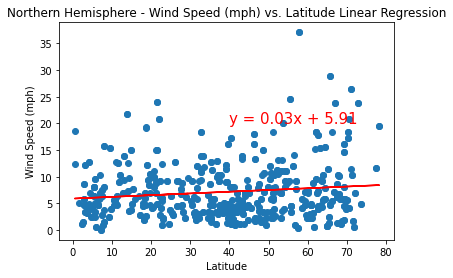

In [65]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, 40, 20)

# Set  title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

In [78]:
print('-----------------------------------------------------------------------------------------------------------')
print("A minute positive correlation shows on the graph above wind speed is focused bellow the linear reg line")
print('-----------------------------------------------------------------------------------------------------------')

-----------------------------------------------------------------------------------------------------------
A minute positive correlation shows on the graph above wind speed is focused bellow the linear reg line
-----------------------------------------------------------------------------------------------------------


The r-squared is : -0.24


Text(0, 0.5, 'Wind Speed (mph)')

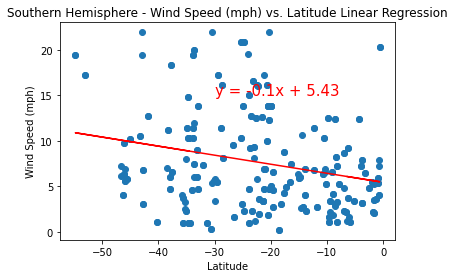

In [66]:

# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, -30, 15)

# Set  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")


In [79]:
print('-----------------------------------------------------------------------------------------------------------')
print("A negative correlation is present when we look at the wind speed vs Latitude in the Southern Hemisphere")
print('-----------------------------------------------------------------------------------------------------------')

-----------------------------------------------------------------------------------------------------------
A negative correlation is present when we look at the wind speed vs Latitude in the Southern Hemisphere
-----------------------------------------------------------------------------------------------------------
